# Anime Score Classifier using Neural Networks (With popularity)

# 1. Importing Libaries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import regularizers

In [42]:
df = pd.read_csv('mal-anime.csv')
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [43]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

# 3. Data Preprocessing

In [44]:
genres = df['Genres']
split_genres = genres.str.split(',').apply(lambda x: [i.strip() for i in x])

# Flatten the list of genres and find the unique genres
unique_genres = pd.unique([item for sublist in split_genres for item in sublist])
print(unique_genres)

['Action' 'Adventure' 'Comedy' 'Drama' 'Sci-Fi' 'Space' 'Mystery'
 'Shounen' 'Police' 'Supernatural' 'Magic' 'Fantasy' 'Sports' 'Josei'
 'Romance' 'Slice of Life' 'Cars' 'Seinen' 'Horror' 'Psychological'
 'Thriller' 'Super Power' 'Martial Arts' 'School' 'Ecchi' 'Vampire'
 'Military' 'Historical' 'Dementia' 'Mecha' 'Demons' 'Samurai' 'Game'
 'Shoujo' 'Harem' 'Music' 'Shoujo Ai' 'Shounen Ai' 'Kids' 'Hentai'
 'Parody' 'Yuri' 'Yaoi' 'Unknown']


C:\Users\thedh\AppData\Local\Temp\ipykernel_18804\1987430990.py:5: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_genres = pd.unique([item for sublist in split_genres for item in sublist])


In [45]:
for genre in unique_genres:
    df[genre] = split_genres.apply(lambda x: 1 if genre in x else 0)
df.rename(columns={'Unknown': 'Unknown_Genre'}, inplace=True)
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Action',
       'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen',
       'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei',
       'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological',
       'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire',
       'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai',
       'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown_Genre'],
      dtype='objec

In [46]:
print(len(df[df["Episodes"] == "Unknown"]["Name"]))
print(df[df["Episodes"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Episodes' column 
df = df[df['Episodes'] != 'Unknown']
print(len(df[df["Score"] == "Unknown"]["Name"]))
print(df[df["Score"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Score', 'Ranked', and 'Aired' column 
df = df[df['Score'] != 'Unknown']
# df = df[df['Ranked'] != 'Unknown'] # not needed cause we never use ranked
df = df[df['Aired'] != 'Unknown']

516
11                     One Piece
211              Detective Conan
871             Crayon Shin-chan
1093            Nintama Rantarou
1787          Sore Ike! Anpanman
2203                   Sazae-san
3650                   Ojarumaru
4477    Chibi Maruko-chan (1995)
5040                    Knyacki!
5334                   Hanakappa
Name: Name, dtype: object
4730
1404                                     Obake no Q-tarou
1504                                      PostPet Momobin
1578                           Shibawanko no Wa no Kokoro
1699                              Silk Road Shounen Yuuto
1893    Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...
1990    Kouchuu Ouja Mushiking Super Battle Movie: Yam...
2165                                  Touma Kishinden Oni
2422            Dorami-chan: Wow, The Kid Gang of Bandits
2425                   Dorami-chan: Hello Kyouryuu Kids!!
2428                        Dorami-chan: A Blue Straw Hat
Name: Name, dtype: object


In [47]:
smallest_years = []

for aired in df['Aired']:
    # Extract all years using regular expressions
    years = re.findall('(\d{4})', aired)
    
    # Convert the years to integers
    years = [int(year) for year in years] 
    if years:
        smallest_years.append(min(years))
    else:
        smallest_years.append(np.nan)

# Replace the 'Aired' column with the smallest years
df['Aired'] = smallest_years
df['Aired'].head()

0    1998
1    2001
2    1998
3    2002
4    2004
Name: Aired, dtype: int64

In [48]:
def convert_to_seconds(duration):
    time_units = duration.split()
    seconds = 0
    for i in range(0, len(time_units), 2):
        if i+1 < len(time_units):
            if 'h' in time_units[i+1]:
                seconds += int(time_units[i]) * 3600
            elif 'm' in time_units[i+1]:
                seconds += int(time_units[i]) * 60
            elif 's' in time_units[i+1]:
                seconds += int(time_units[i])
    return seconds

df['Duration'] = df['Duration'].apply(convert_to_seconds)
df['Duration'].head()

0    1440
1    6900
2    1440
3    1500
4    1380
Name: Duration, dtype: int64

In [49]:
# Standardizing data types
df['Score'] = df['Score'].astype(float)
df['Episodes'] = df['Episodes'].astype(np.int64)
df['Popularity'] = df['Popularity'].astype(np.int64)
# df['Members'] = df['Members'].astype(np.int64)
# df['Completed'] = df['Completed'].astype(np.int64)
# df['Dropped'] = df['Dropped'].astype(np.int64)
# df['Ranked'] = df['Ranked'].astype(float)
# df['Plan to Watch'] = df['Plan to Watch'].astype(np.int64)

## 4. Data Visualization

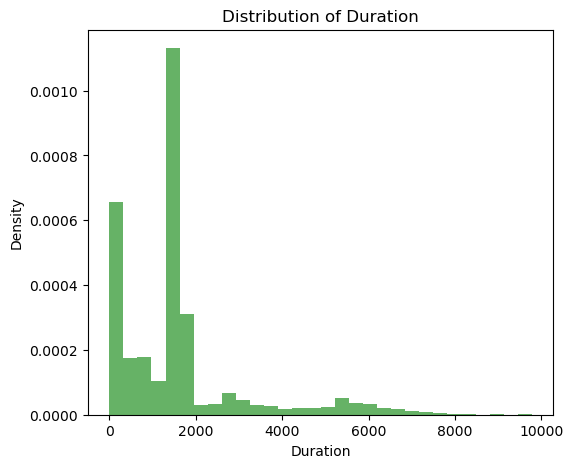

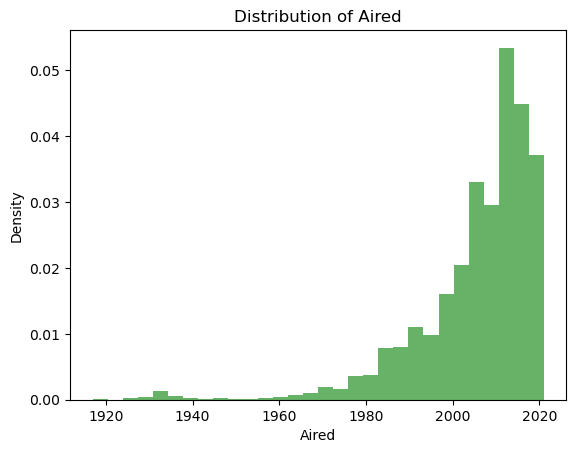

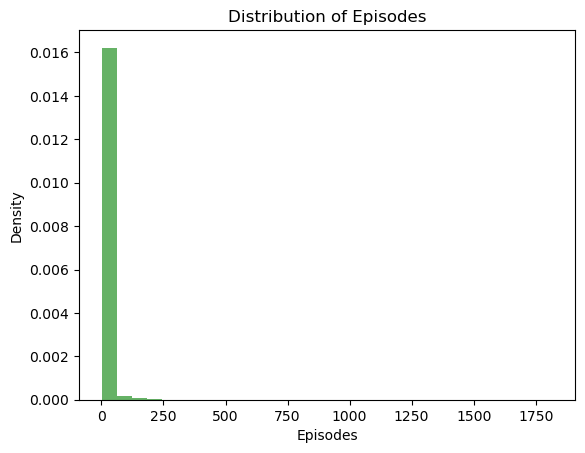

In [50]:
# Drop NaN values from 'Duration' column
duration = df['Duration'].dropna()
aired = df['Aired'].dropna()
episodes = df['Episodes'].dropna()

plt.figure(figsize=(6, 5))

# Create a histogram with a density curve
plt.hist(duration, bins=30, density=True, alpha=0.6, color='g')

plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Density')

plt.show()

# Repeat for 'Aired' and 'Episodes'
plt.hist(aired, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Aired')
plt.xlabel('Aired')
plt.ylabel('Density')
plt.show()

plt.hist(episodes, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Density')
plt.show()

In [51]:
columns_to_drop = ['Type', 'Rating', 'Genres', 'Score-1', 'Score-2', 'Score-3', 'Score-4', 'Score-5', 'Score-6', 'Score-7', 'Score-8', 'Score-9', 'Score-10', 
                   'Ranked', 'Favorites', 'Members' , 'Watching' , 'On-Hold' , 'Completed', 'Dropped', 'Plan to Watch', 
                   'MAL_ID', 'Name', 'English name' , 'Japanese name' , 'Premiered' , 'Producers', 'Licensors', 
                   'Source', 'Studios', 
                   'Unknown_Genre','Hentai', 'Yuri', 'Yaoi']

df = df.drop(columns_to_drop, axis=1)
df.columns

Index(['Score', 'Episodes', 'Aired', 'Duration', 'Popularity', 'Action',
       'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen',
       'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei',
       'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological',
       'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire',
       'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai',
       'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Parody'],
      dtype='object')

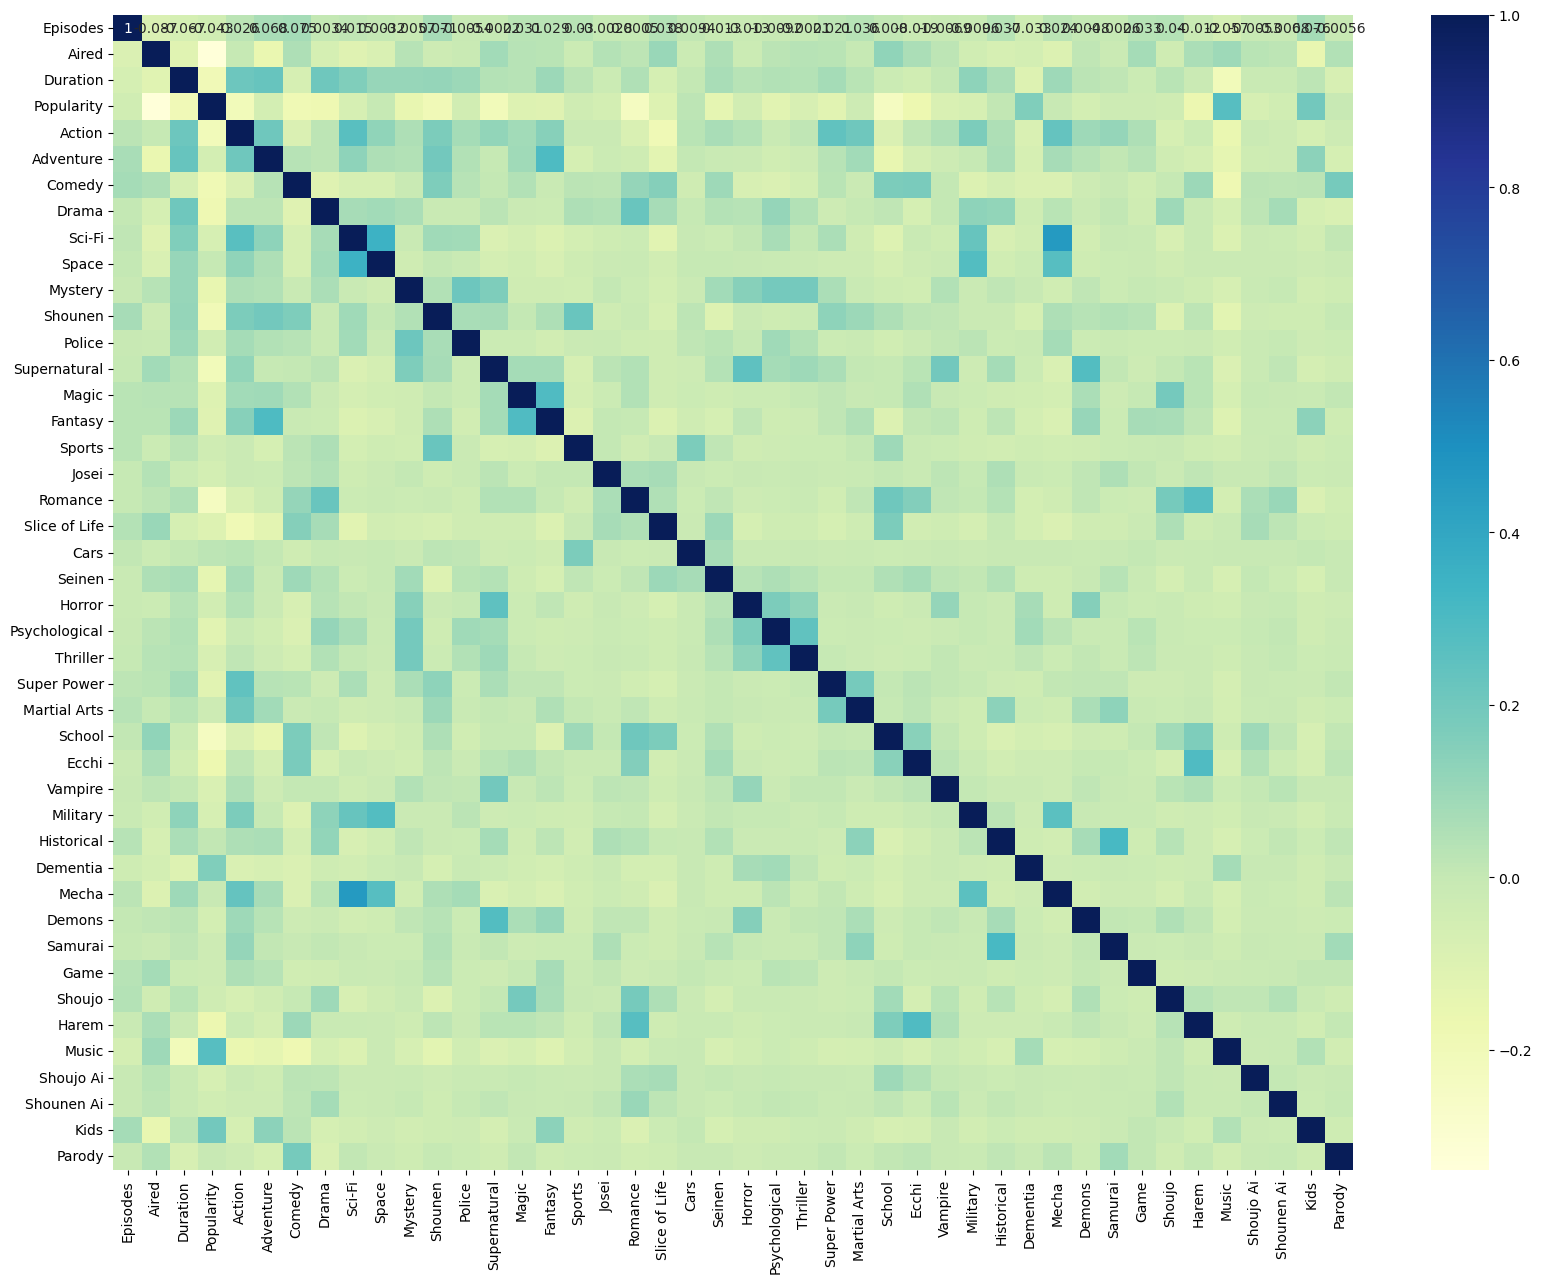

In [52]:

scaler = StandardScaler()

# Fit the scaler to the 'Aired', 'Completed', 'Dropped', and 'Favorites' columns and transform them
df[['Episodes', 'Duration', 'Aired', 'Popularity']] = scaler.fit_transform(df[['Episodes', 'Duration', 'Aired', 'Popularity']])
X = df.drop('Score', axis=1)
y = df['Score']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.show()

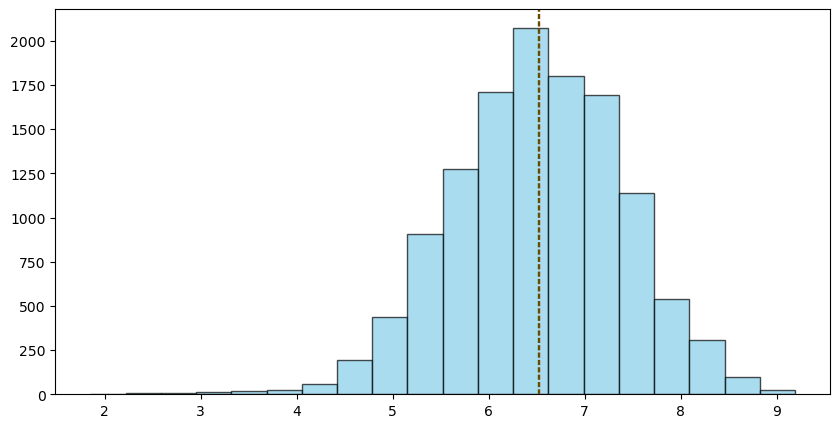

In [53]:
plt.figure(figsize=(10, 5))
plt.hist(df['Score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Score'].median(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Score'].mean(), color='green', linestyle='dashed', linewidth=1)

In [54]:
df['Score_Class'] = df['Score'].apply(lambda x: 1 if x >= 7.25 else 0)

In [55]:
X = df.drop(['Score', 'Score_Class'], axis=1)
y = df['Score_Class']

# def custom_leaky_relu(x):
#     return tf.nn.leaky_relu(x, alpha=0.02)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% for validation, 15% for testing

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
    # tf.keras.layers.Dense(64, activation=custom_leaky_relu, kernel_regularizer=regularizers.l2(0.001)),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='categorical_hinge', optimizer='nadam', metrics=['accuracy'])


# Train the model with validation data
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
539/539 [==============================] - 1s 1ms/step - loss: 1.0726 - accuracy: 0.8266 - val_loss: 0.9909 - val_accuracy: 0.8635
Epoch 2/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9668 - accuracy: 0.8670 - val_loss: 0.9610 - val_accuracy: 0.8651
Epoch 3/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9488 - accuracy: 0.8680 - val_loss: 0.9521 - val_accuracy: 0.8694
Epoch 4/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9440 - accuracy: 0.8654 - val_loss: 0.9542 - val_accuracy: 0.8619
Epoch 5/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9419 - accuracy: 0.8635 - val_loss: 0.9450 - val_accuracy: 0.8716
Epoch 6/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9391 - accuracy: 0.8669 - val_loss: 0.9498 - val_accuracy: 0.8602
Epoch 7/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9390 - accuracy: 0.8648 - val_loss: 0.9437 - val_accuracy: 0.8694
Epoch 

In [56]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

58/58 [==============================] - 0s 887us/step - loss: 0.9358 - accuracy: 0.8630
Test accuracy: 0.8630211353302002
58/58 [==============================] - 0s 776us/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1455
           1       0.68      0.66      0.67       392

    accuracy                           0.86      1847
   macro avg       0.80      0.79      0.79      1847
weighted avg       0.86      0.86      0.86      1847



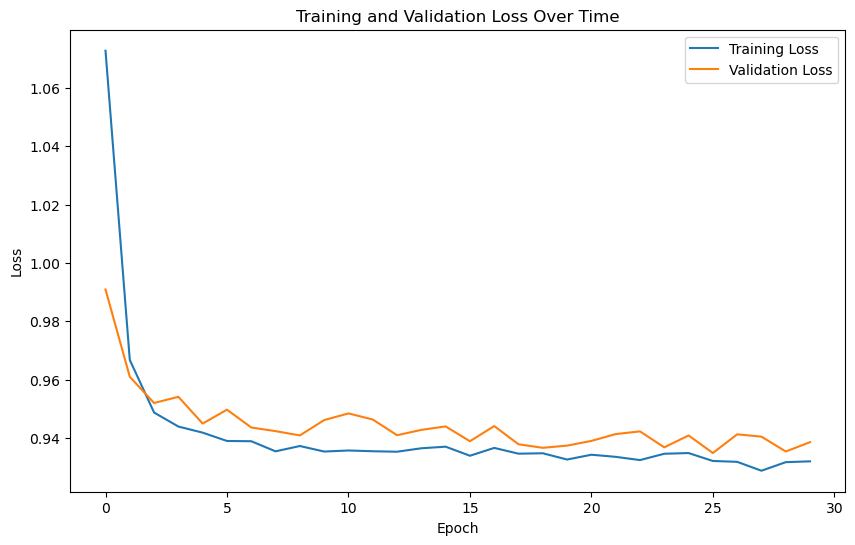

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
539/539 [==============================] - 1s 1ms/step - loss: 1.0774 - accuracy: 0.8220 - val_loss: 0.9943 - val_accuracy: 0.8537
Epoch 2/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9664 - accuracy: 0.8610 - val_loss: 0.9623 - val_accuracy: 0.8662
Epoch 3/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9502 - accuracy: 0.8651 - val_loss: 0.9547 - val_accuracy: 0.8662
Epoch 4/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9437 - accuracy: 0.8655 - val_loss: 0.9475 - val_accuracy: 0.8722
Epoch 5/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9405 - accuracy: 0.8680 - val_loss: 0.9471 - val_accuracy: 0.8694
Epoch 6/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9379 - accuracy: 0.8677 - val_loss: 0.9441 - val_accuracy: 0.8651
Epoch 7/30
539/539 [==============================]

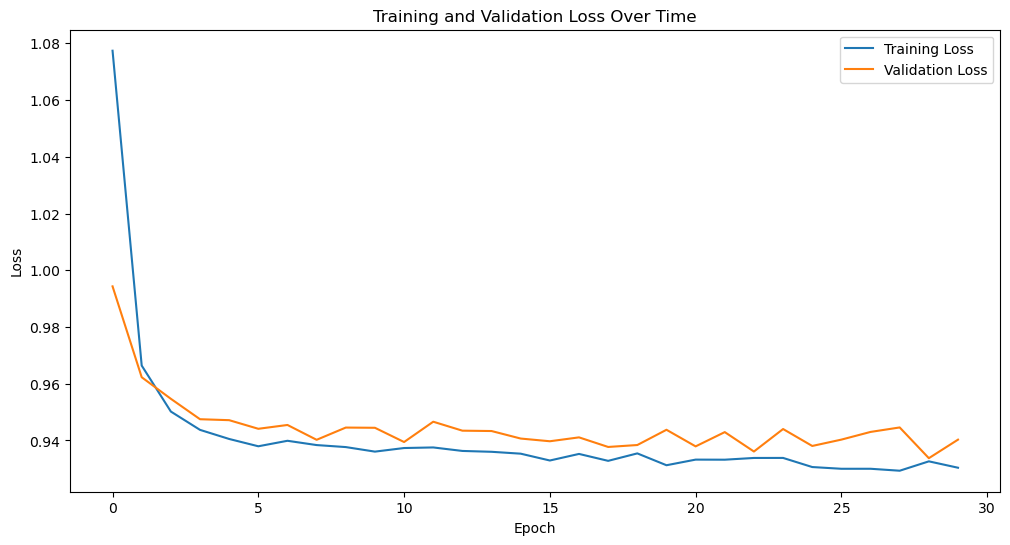

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/30
539/539 [==============================] - 1s 1ms/step - loss: 1.0732 - accuracy: 0.8244 - val_loss: 0.9914 - val_accuracy: 0.8629
Epoch 2/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9667 - accuracy: 0.8659 - val_loss: 0.9623 - val_accuracy: 0.8651
Epoch 3/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9504 - accuracy: 0.8629 - val_loss: 0.9518 - val_accuracy: 0.8667
Epoch 4/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9441 - accuracy: 0.8646 - val_loss: 0.9460 - val_accuracy: 0.8759
Epoch 5/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9408 - accuracy: 0.8683 - val_loss: 0.9476 - val_accuracy: 0.8640
Epoch 6/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9386 - accuracy: 0.8677 - val_loss: 0.9469 - val_accuracy: 0.8651
Epoch 7/30
539/539 [==============================]

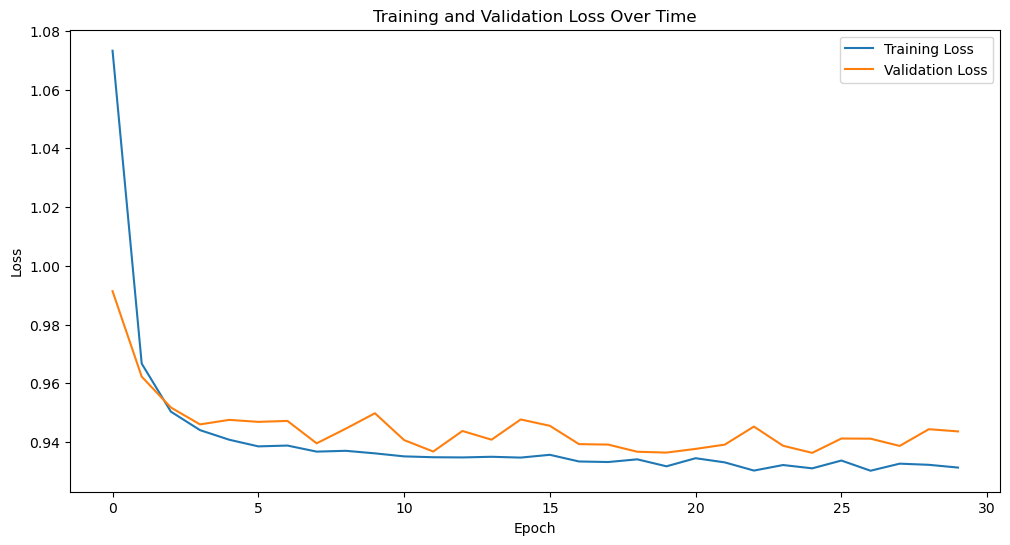

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/30
539/539 [==============================] - 2s 2ms/step - loss: 1.0773 - accuracy: 0.8157 - val_loss: 0.9902 - val_accuracy: 0.8586
Epoch 2/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9667 - accuracy: 0.8642 - val_loss: 0.9617 - val_accuracy: 0.8629
Epoch 3/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9505 - accuracy: 0.8651 - val_loss: 0.9541 - val_accuracy: 0.8657
Epoch 4/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9446 - accuracy: 0.8657 - val_loss: 0.9499 - val_accuracy: 0.8651
Epoch 5/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9402 - accuracy: 0.8659 - val_loss: 0.9457 - val_accuracy: 0.8705
Epoch 6/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9393 - accuracy: 0.8651 - val_loss: 0.9439 - val_accuracy: 0.8716
Epoch 7/30
539/539 [==============================]

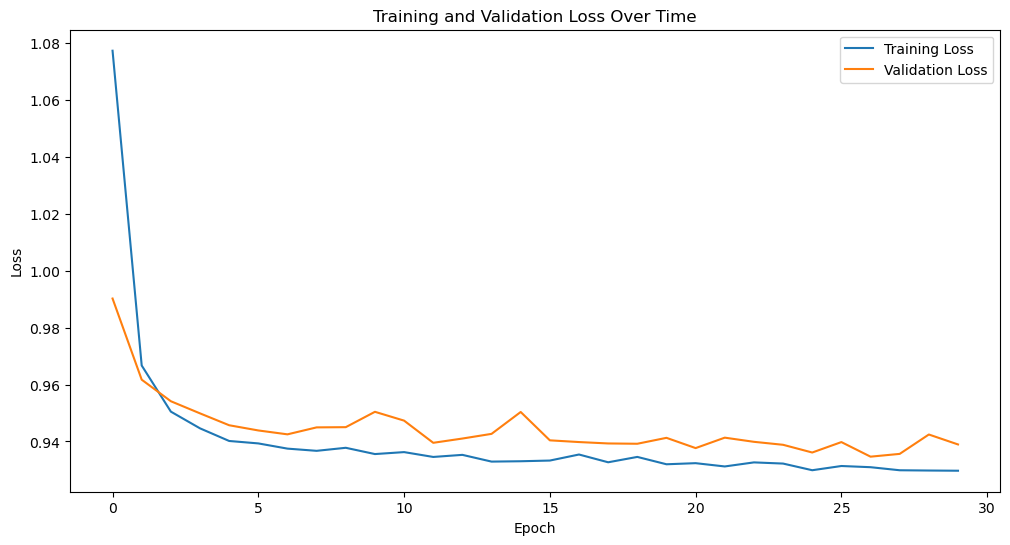

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/30
539/539 [==============================] - 2s 2ms/step - loss: 1.0696 - accuracy: 0.8231 - val_loss: 0.9858 - val_accuracy: 0.8629
Epoch 2/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9642 - accuracy: 0.8675 - val_loss: 0.9556 - val_accuracy: 0.8722
Epoch 3/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9483 - accuracy: 0.8661 - val_loss: 0.9527 - val_accuracy: 0.8678
Epoch 4/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9412 - accuracy: 0.8691 - val_loss: 0.9537 - val_accuracy: 0.8635
Epoch 5/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9432 - accuracy: 0.8628 - val_loss: 0.9470 - val_accuracy: 0.8651
Epoch 6/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9393 - accuracy: 0.8647 - val_loss: 0.9481 - val_accuracy: 0.8629
Epoch 7/30
539/539 [==============================]

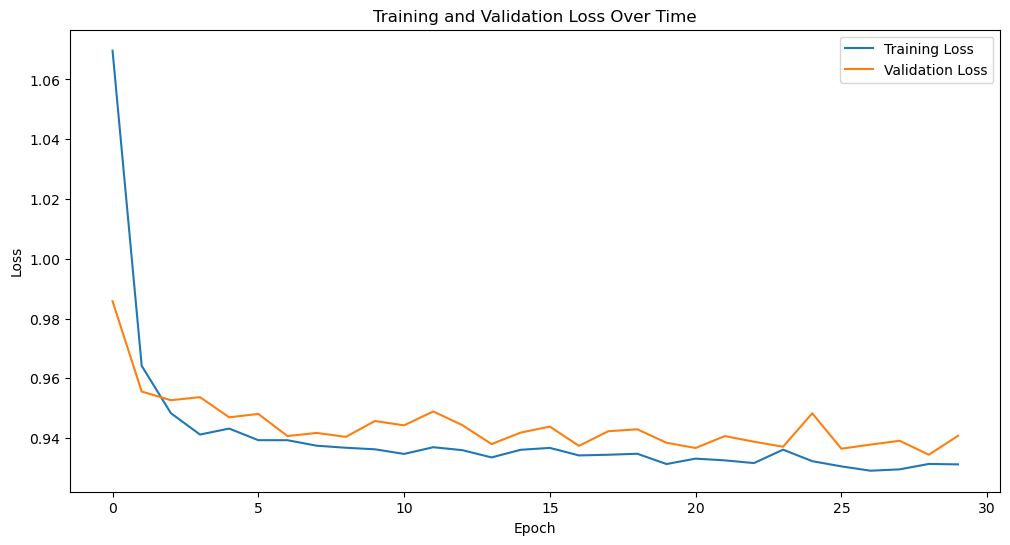

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/30
539/539 [==============================] - 1s 2ms/step - loss: 1.0774 - accuracy: 0.8181 - val_loss: 0.9904 - val_accuracy: 0.8613
Epoch 2/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9653 - accuracy: 0.8648 - val_loss: 0.9635 - val_accuracy: 0.8613
Epoch 3/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9473 - accuracy: 0.8670 - val_loss: 0.9589 - val_accuracy: 0.8597
Epoch 4/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9438 - accuracy: 0.8649 - val_loss: 0.9527 - val_accuracy: 0.8667
Epoch 5/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9415 - accuracy: 0.8644 - val_loss: 0.9471 - val_accuracy: 0.8667
Epoch 6/30
539/539 [==============================] - 1s 1ms/step - loss: 0.9421 - accuracy: 0.8628 - val_loss: 0.9454 - val_accuracy: 0.8673
Epoch 7/30
539/539 [==============================]

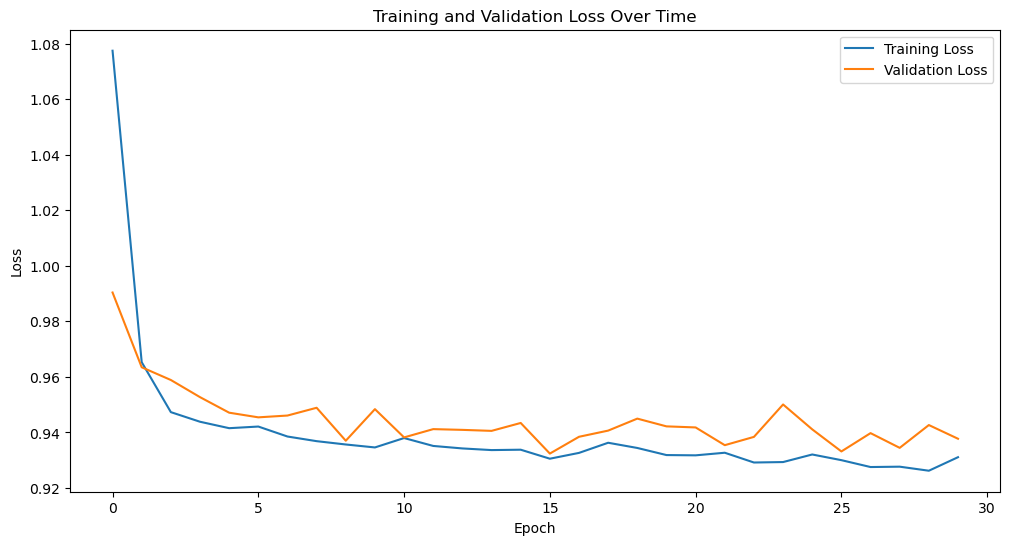

In [58]:


kfold = StratifiedKFold(n_splits=5, shuffle=True)

fold_no = 1
accuracies = [] 
for train, test in kfold.split(X, y):

  
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% for training
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% for validation, 15% for testing

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)


  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(loss='categorical_hinge', optimizer='nadam', metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')


  history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=1)

  loss, accuracy = model.evaluate(X_test, y_test)
  accuracies.append(accuracy)

  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss Over Time')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  
  fold_no = fold_no + 1

In [59]:
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(accuracies)

Mean accuracy: 0.8591229081153869
[0.8608554601669312, 0.859231173992157, 0.8538169860839844, 0.8576069474220276, 0.8641039729118347]


<ErrorbarContainer object of 3 artists>

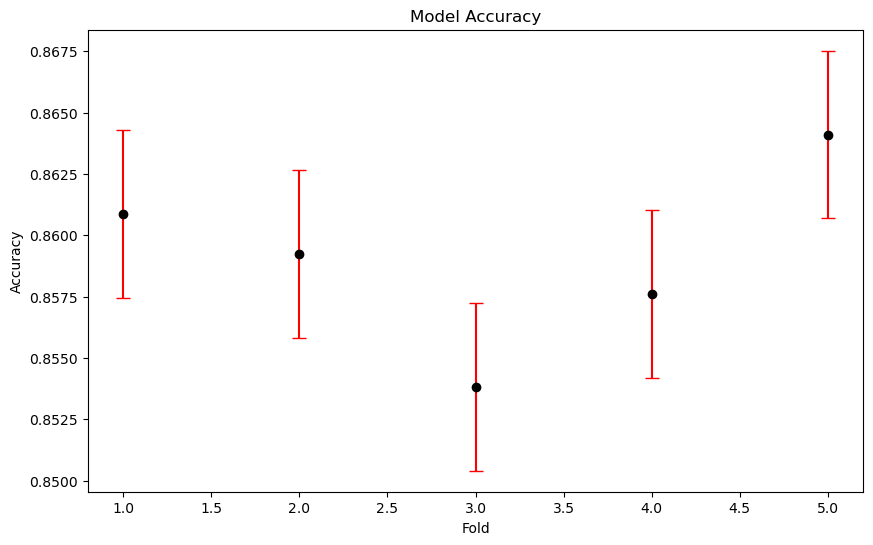

In [60]:
plt.figure(figsize=(10, 6))
plt.title('Model Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.errorbar(range(1, 6), accuracies, yerr=np.std(accuracies), fmt='o', color='black', ecolor='red', capsize=5)